In [ ]:
# #pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="jlqvTrnc1teS9gaYyuPr")
# project = rf.workspace("myplat").project("indonesian-plate-model")
# version = project.version(4)
# dataset = version.download("yolov8")


In [4]:
#pip install ultralytics
!yolo task=detect mode=train epochs=100 data=data.yaml model=yolov8n.pt imgsz=640 batch=8

Ultralytics YOLOv8.2.28 🚀 Python-3.11.9 torch-2.1.2+cu121 CUDA:0 (NVIDIA RTX A2000, 6138MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

In [5]:
from ultralytics import YOLO
model = YOLO('runs/detect/train8/weights/best.pt')

model.info()

Model summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

In [8]:
#test image
!yolo task=detect mode=predict model=runs/detect/train8/weights/best.pt show=False conf=0.5 source=Plate_Test.jpeg save=True


Ultralytics YOLOv8.2.28 🚀 Python-3.11.9 torch-2.1.2+cu121 CUDA:0 (NVIDIA RTX A2000, 6138MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /home/herfandi/NN/YoloV8/Plate_Test.jpeg: 480x640 1 license-plate, 66.9ms
Speed: 3.1ms preprocess, 66.9ms inference, 79.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


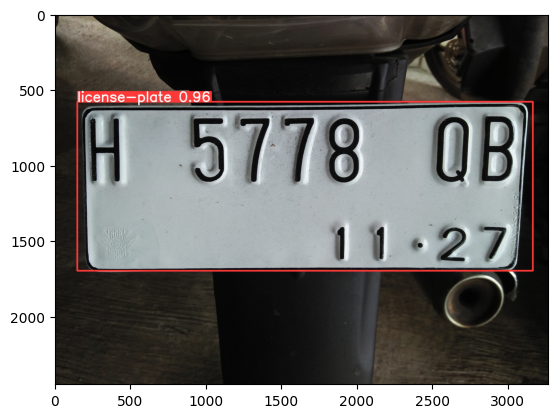

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = 'runs/detect/predict/Plate_Test.jpeg'

# Load and display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()


In [12]:
#test Video
!yolo task=detect mode=predict model=runs/detect/train8/weights/best.pt show=True conf=0.5 source=Plate_Test_Video.mp4

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'

Ultralytics YOLOv8.2.28 🚀 Python-3.11.9 torch-2.1.2+cu121 CUDA:0 (NVIDIA RTX A2000, 6138MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/320) /home/herfandi/NN/YoloV8/Plate_Test_Video.mp4: 384x640 1 license-plate, 64.6ms
video 1/1 (frame 2/320) /home/herfandi/NN/YoloV8/Plate_Test_Video.mp4: 384x640 1 license-plate, 6.7ms
video 1/1 (frame 3/320) /home/herfandi/NN/YoloV8/Plate_Test_Video.mp4: 384x640 1 license-plate, 6.5ms
video 1/1 (frame 4/320) /home/herfandi/NN/YoloV8/Plate_Test_Video.mp4: 384x640 1 license-plate, 6.2ms
video 1/1 (frame 5/320) 

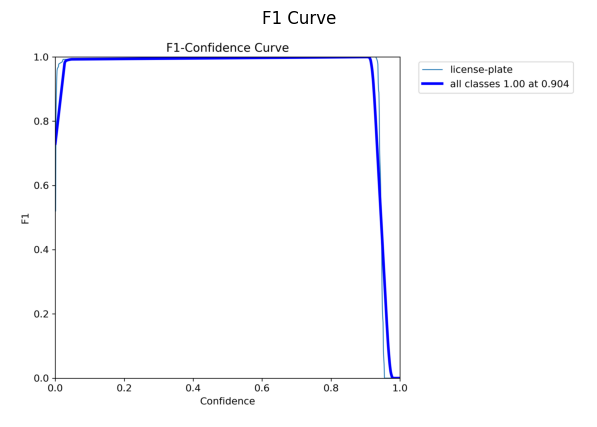

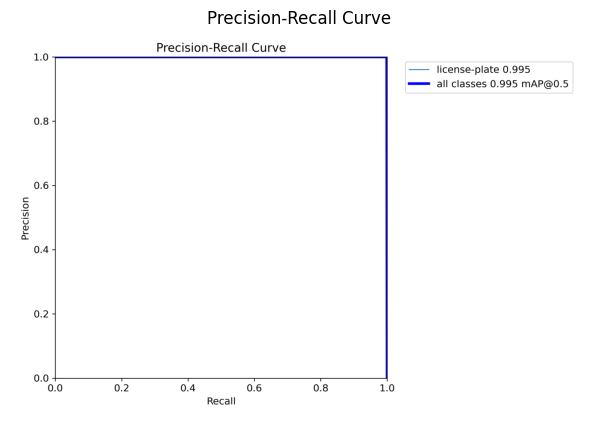

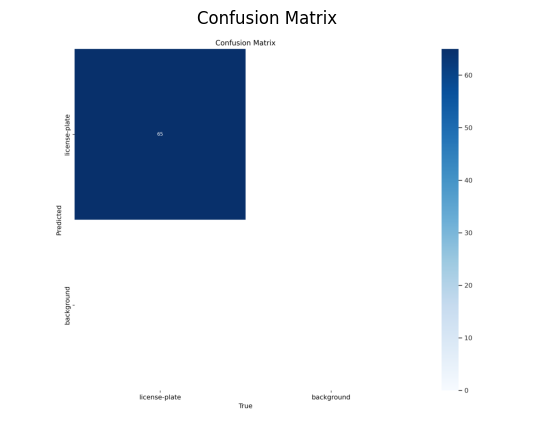

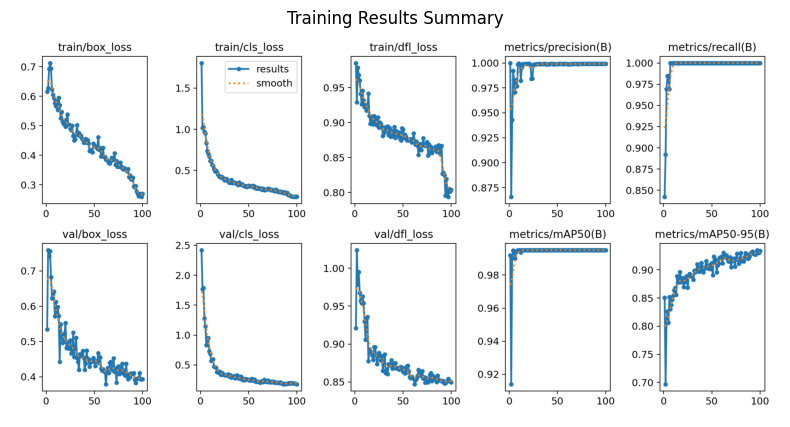

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display F1 curve
f1_curve = mpimg.imread('runs/detect/train8/F1_curve.png')
plt.figure(figsize=(10, 5))
plt.title('F1 Curve')
plt.imshow(f1_curve)
plt.axis('off')
plt.show()

# Load and display PR curve
pr_curve = mpimg.imread('runs/detect/train8/PR_curve.png')
plt.figure(figsize=(10, 5))
plt.title('Precision-Recall Curve')
plt.imshow(pr_curve)
plt.axis('off')
plt.show()

# Load and display Confusion Matrix
conf_matrix = mpimg.imread('runs/detect/train8/confusion_matrix.png')
plt.figure(figsize=(10, 5))
plt.title('Confusion Matrix')
plt.imshow(conf_matrix)
plt.axis('off')
plt.show()

# Load and display Training Results Summary
results = mpimg.imread('runs/detect/train8/results.png')
plt.figure(figsize=(10, 5))
plt.title('Training Results Summary')
plt.imshow(results)
plt.axis('off')
plt.show()


In [16]:
import pandas as pd

# Load results.csv into a DataFrame
results_df = pd.read_csv('runs/detect/train8/results.csv')

# Check the first few rows and column names
print(results_df.head())
print(results_df.columns)

                  epoch        train/box_loss        train/cls_loss  \
0                     1               0.61537               1.80460   
1                     2               0.62739               1.01390   
2                     3               0.69299               1.02480   
3                     4               0.71263               0.97030   
4                     5               0.69410               0.94886   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0               0.98511               1.00000               0.84214   
1               0.92917               0.86563               0.89199   
2               0.97869               0.94295               0.96923   
3               0.96794               0.99209               0.98462   
4               0.96013               0.98301               0.98462   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.99196               0.85081               0.53433   
1   